In [197]:
import pandas as pd
import requests
import json
import time
import re
import matplotlib.pyplot as plt

%matplotlib inline

In [205]:
pwd

'/Users/adamburpee/Capstone/Capstone/code'

In [4]:
ls

reddit_api_pushshift.ipynb  scrap.ipynb


In [5]:
url = 'https://api.pushshift.io/reddit/search/'

In [6]:
params = {'searchType' : 'comment', 
          'subreddit' : 'blackops4',
          'sort' : 'desc',
          'size' : 100,
          'before': '193d',
          'after' : '194d'
         }

In [7]:
response = requests.get(url, params = params)

In [8]:
response.status_code

200

In [9]:
len(response.json()['data'])

100

In [10]:
response.json()['data'][1]['created_utc']

1539975317

In [11]:
[time.asctime(time.gmtime(response.json()['data'][i]['created_utc'])) for i in range(len(response.json()['data']))]

['Fri Oct 19 18:55:17 2018',
 'Fri Oct 19 18:55:17 2018',
 'Fri Oct 19 18:55:15 2018',
 'Fri Oct 19 18:55:12 2018',
 'Fri Oct 19 18:55:11 2018',
 'Fri Oct 19 18:55:10 2018',
 'Fri Oct 19 18:55:09 2018',
 'Fri Oct 19 18:55:09 2018',
 'Fri Oct 19 18:55:06 2018',
 'Fri Oct 19 18:55:06 2018',
 'Fri Oct 19 18:55:05 2018',
 'Fri Oct 19 18:55:05 2018',
 'Fri Oct 19 18:55:03 2018',
 'Fri Oct 19 18:55:02 2018',
 'Fri Oct 19 18:55:02 2018',
 'Fri Oct 19 18:55:02 2018',
 'Fri Oct 19 18:55:01 2018',
 'Fri Oct 19 18:55:00 2018',
 'Fri Oct 19 18:54:59 2018',
 'Fri Oct 19 18:54:58 2018',
 'Fri Oct 19 18:54:57 2018',
 'Fri Oct 19 18:54:57 2018',
 'Fri Oct 19 18:54:56 2018',
 'Fri Oct 19 18:54:55 2018',
 'Fri Oct 19 18:54:53 2018',
 'Fri Oct 19 18:54:52 2018',
 'Fri Oct 19 18:54:52 2018',
 'Fri Oct 19 18:54:52 2018',
 'Fri Oct 19 18:54:51 2018',
 'Fri Oct 19 18:54:51 2018',
 'Fri Oct 19 18:54:48 2018',
 'Fri Oct 19 18:54:47 2018',
 'Fri Oct 19 18:54:47 2018',
 'Fri Oct 19 18:54:47 2018',
 'Fri Oct 19 1

In [12]:
def filename_format_log(file_path, 
                        logfile = '../data/file_log.txt',  
                        file_description = None,
                        now = round(time.time())): 
   
    try:
        ext = re.search('(?<!^)(?<!\.)\.(?!\.)', file_path).start() 
    except:
        raise NameError('Please enter a relative path with a file extension.') 
    
    stamp = re.search('(?<!^)(?<!\.)[a-z]+_[a-z]+(?=\.)', file_path).start()
    formatted_name = f'{file_path[:stamp]}{round(time.time())}_{file_path[stamp:]}'
    #now = now
    if not file_description:
        file_description = f'Pull: {time.asctime(time.gmtime(round(time.time())))}'
    with open(logfile, 'a+') as f:
        f.write(f'{formatted_name}: {file_description}\n')
    return formatted_name, now, file_description

In [118]:
def reddit_query(subreddits, n_samples=50000, searchType='comments', before=None, after=None):
    url = f'https://api.pushshift.io/reddit/search/'
    last_comment = round(time.time())
    comment_list = []

    run = 1
    while len(comment_list) < n_samples:

        try:
            print(f'Starting query {run}')

            params = {'searchType':searchType,
              'subreddit':subreddits,
              'sort':'desc',
              'size':1000,
              'before':before,
              'after':after,
             }

            response = requests.get(url, params = params)
            posts = response.json()['data']

            if len(posts) == 0:
                last_comment = last_comment
            else:
                last_comment = posts[-1]['created_utc']
                before = posts[-1]['created_utc']
                comment_list.extend(posts)
                timestamp = posts[-1]['created_utc']
                time.sleep(.5)
                run += 1
        except:
            if response.status_code != 200:
                return f'Check status. Error code: {response.status_code}'
            else:
                return 'Error. Pull not completed.'

    formatted_name, now, file_description = filename_format_log(file_path =f'../assets/raw_{searchType}s.json', now=timestamp)
    with open(formatted_name, 'w+') as f:
        json.dump(comment_list, f)

    print(f'Saved and completed query and returned {len(comment_list)} {searchType}s.')
    print(f'Reddit text is ready for processing.')
    return print(f'Last timestamp was {timestamp}.')

In [135]:
reddit_query(subreddits = 'blackops4', n_samples=1_000_000, before = None, after = None)

Starting query 1
Starting query 2
Starting query 3
Starting query 4
Starting query 5
Starting query 6
Starting query 7
Starting query 8
Starting query 9
Starting query 10
Starting query 11
Starting query 12
Starting query 13
Starting query 14
Starting query 15
Starting query 16
Starting query 17
Starting query 18
Starting query 19
Starting query 20
Starting query 21
Starting query 22
Starting query 23
Starting query 24
Starting query 25
Starting query 26
Starting query 27
Starting query 28
Starting query 29
Starting query 30
Starting query 31
Starting query 32
Starting query 33
Starting query 34
Starting query 35
Starting query 36
Starting query 37
Starting query 38
Starting query 39
Starting query 40
Starting query 41
Starting query 42
Starting query 43
Starting query 44
Starting query 45
Starting query 46
Starting query 47
Starting query 48
Starting query 49
Starting query 50
Starting query 51
Starting query 52
Starting query 53
Starting query 54
Starting query 55
Starting query 56
S

In [136]:
with open(f'../assets/1556673865_raw_commentss.json', 'r') as f:
    blackops_comments_1 = json.load(f)

In [149]:
reddit_query(subreddits = 'blackops4', n_samples= 200_000, before = 1543557001, after = None)

Starting query 1
Starting query 2
Starting query 3
Starting query 4
Starting query 5
Starting query 6
Starting query 7
Starting query 8
Starting query 9
Starting query 10
Starting query 11
Starting query 12
Starting query 13
Starting query 14
Starting query 15
Starting query 16
Starting query 17
Starting query 18
Starting query 19
Starting query 20
Starting query 21
Starting query 22
Starting query 23
Starting query 24
Starting query 25
Starting query 26
Starting query 27
Starting query 28
Starting query 29
Starting query 30
Starting query 31
Starting query 32
Starting query 33
Starting query 34
Starting query 35
Starting query 36
Starting query 37
Starting query 38
Starting query 39
Starting query 40
Starting query 41
Starting query 42
Starting query 43
Starting query 44
Starting query 45
Starting query 46
Starting query 47
Starting query 48
Starting query 49
Starting query 50
Starting query 51
Starting query 52
Starting query 53
Starting query 54
Starting query 55
Starting query 56
S

In [150]:
with open(f'../assets/1556675481_raw_commentss.json', 'r') as f:
    blackops_comments_2 = json.load(f)

In [158]:
reddit_query(subreddits = 'blackops4', n_samples= 1_000_000, before = 1542320905, after = None)

Starting query 1
Starting query 2
Starting query 3
Starting query 4
Starting query 5
Starting query 6
Starting query 7
Starting query 8
Starting query 9
Starting query 10
Starting query 11
Starting query 12
Starting query 13
Starting query 14
Starting query 15
Starting query 16
Starting query 17
Starting query 18
Starting query 19
Starting query 20
Starting query 21
Starting query 22
Starting query 23
Starting query 24
Starting query 25
Starting query 26
Starting query 27
Starting query 28
Starting query 29
Starting query 30
Starting query 31
Starting query 32
Starting query 33
Starting query 34
Starting query 35
Starting query 36
Starting query 37
Starting query 38
Starting query 39
Starting query 40
Starting query 41
Starting query 42
Starting query 43
Starting query 44
Starting query 45
Starting query 46
Starting query 47
Starting query 48
Starting query 49
Starting query 50
Starting query 51
Starting query 52
Starting query 53
Starting query 54
Starting query 55
Starting query 56
S

In [159]:
with open(f'../assets/1556677860_raw_commentss.json', 'r') as f:
    blackops_comments_3 = json.load(f)

In [7]:
[time.asctime(time.gmtime(blackops_comments_1[i]['created_utc'])) for i in range(len(blackops_comments_1))]

['Sun Oct 14 18:51:52 2018',
 'Sun Oct 14 18:51:51 2018',
 'Sun Oct 14 18:51:40 2018',
 'Sun Oct 14 18:51:39 2018',
 'Sun Oct 14 18:51:37 2018',
 'Sun Oct 14 18:51:37 2018',
 'Sun Oct 14 18:51:34 2018',
 'Sun Oct 14 18:51:33 2018',
 'Sun Oct 14 18:51:32 2018',
 'Sun Oct 14 18:51:30 2018',
 'Sun Oct 14 18:51:30 2018',
 'Sun Oct 14 18:51:30 2018',
 'Sun Oct 14 18:51:27 2018',
 'Sun Oct 14 18:51:24 2018',
 'Sun Oct 14 18:51:21 2018',
 'Sun Oct 14 18:51:20 2018',
 'Sun Oct 14 18:51:18 2018',
 'Sun Oct 14 18:51:11 2018',
 'Sun Oct 14 18:51:09 2018',
 'Sun Oct 14 18:51:06 2018',
 'Sun Oct 14 18:51:04 2018',
 'Sun Oct 14 18:51:02 2018',
 'Sun Oct 14 18:51:01 2018',
 'Sun Oct 14 18:51:00 2018',
 'Sun Oct 14 18:50:51 2018',
 'Sun Oct 14 18:50:49 2018',
 'Sun Oct 14 18:50:48 2018',
 'Sun Oct 14 18:50:43 2018',
 'Sun Oct 14 18:50:42 2018',
 'Sun Oct 14 18:50:40 2018',
 'Sun Oct 14 18:50:40 2018',
 'Sun Oct 14 18:50:40 2018',
 'Sun Oct 14 18:50:40 2018',
 'Sun Oct 14 18:50:39 2018',
 'Sun Oct 14 1

In [160]:
len(blackops_comments_3)

1000000

In [102]:
blackops_comments_1[1]

{'author': 'AlmightyZeth',
 'author_flair_background_color': None,
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_template_id': None,
 'author_flair_text': None,
 'author_flair_text_color': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_17s4y6yy',
 'author_patreon_flair': False,
 'body': "Like you said a win is a win it just sucks when you are on the losing end. I wasn't even in a fight I just got out healed lol I killed the 3rd place guy as the circle started collapsing had 200 HP and still lost running around looking for the dude while healing. The salt has worn off so it doesn't sting as much, but damn it lol",
 'created_utc': 1554931706,
 'gildings': {'gid_1': 0, 'gid_2': 0, 'gid_3': 0},
 'id': 'ekkw9ya',
 'is_submitter': True,
 'link_id': 't3_bbri50',
 'no_follow': True,
 'parent_id': 't1_ekkvy6s',
 'permalink': '/r/Blackops4/comments/bbri50/just_lost_a_solo_getting_killed_by_the_collapse/ekkw9ya/',
 'retrieved_on': 1554931733,
 'score':

In [161]:
def reddit_parse(sample, df):
    
    col_list = ['author',
                'body',
                'created_utc',
                'score',
                'permalink',
                'gildings'
                ]
    
    df = pd.DataFrame(sample)
    df = df[col_list]
    
    df.rename(columns={'subreddit':'subreddit'}, inplace=True)
    
    col_order = ['author',
                'body',
                'created_utc',
                'score',
                'permalink',
                'gildings'
                ]

    return df[col_order]

In [162]:
df_3 = reddit_parse(blackops_comments_3, df = 'df_3')

In [140]:
df_comments_1.shape

(100000, 6)

In [163]:
df_3['body'].nunique()

948609

In [164]:
list_min_max_utc_3 = [df_3['created_utc'].max(), df_3['created_utc'].min()]

In [58]:
df_comments_1['created_utc'] = df_comments_1['created_utc'].apply(lambda x: time.asctime(time.gmtime(x)))

(100000, 6)

In [157]:
df_2['created_utc'].min()

1542320905

In [165]:
for i in list_min_max_utc_3:
    print(time.asctime(time.gmtime(i)))

Thu Nov 15 22:28:17 2018
Mon Sep 10 20:33:06 2018


In [172]:
df.head()

,author,body,created_utc,score,permalink,gildings
0,captaincarno,Have you tried out days gone?,1556671862,1,/r/Blackops4/comments/bj0p5m/treyarchactivisio...,{}
1,bigtitsRmarvelous,"That makes me want to kiss you, but you’re pro...",1556671860,1,/r/Blackops4/comments/bjb0vd/got_afterlife_on_...,{}
2,Turok1134,At this point I'm convinced this sub is full o...,1556671860,1,/r/Blackops4/comments/bjamqv/the_truth_shall_s...,{}
3,KEdoubleNY,I played against my friends a few times. You ...,1556671857,1,/r/Blackops4/comments/bjaxlx/play_against_frie...,{}
4,Kongasaurus_Rex,Closet Indian... like the one in the cupboard ...,1556671851,1,/r/Blackops4/comments/bj9j0r/ill_be_your_fake_...,{}


In [168]:
df_2.head()

,author,body,created_utc,score,permalink,gildings
0,Slaya420D,Yeah but it's incredibly buggy,1543556995,1,/r/Blackops4/comments/a1pml4/where_is_nuketown...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
1,slayeromen,Any chance we get an update here?,1543556984,1,/r/Blackops4/comments/9r9h1l/request_networkin...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
2,EpicNinjaIx,$100*,1543556981,1,/r/Blackops4/comments/a1nedp/what_the_actual_f...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
3,jerm500,I’m just being realistic. A business is gonna ...,1543556967,1,/r/Blackops4/comments/a1pi8e/one_month_ago_utr...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
4,Floatography,If they actually stay together and communicate...,1543556926,1,/r/Blackops4/comments/a1mdyv/this_man_must_be_...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"


In [169]:
df_3.head()

,author,body,created_utc,score,permalink,gildings
0,I_Ride_Bradys_Dick,When I do manage to find a sniper the circle i...,1542320897,1,/r/Blackops4/comments/9xfy7i/finally_got_rezno...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
1,JerboiZoobat,Bad kids love specialists Whatr your stats lik...,1542320896,1,/r/Blackops4/comments/9xbx2u/firebreak_everyon...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
2,QuintoK47,But the only method of earning COD Points is t...,1542320889,1,/r/Blackops4/comments/9xfqr1/this_is_how_the_b...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
3,ElitePotato77,Well thats the issue with AAA games nowadays i...,1542320887,1,/r/Blackops4/comments/9xb2do/treyarch_you_have...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"
4,Fewbegrrrhe,do you know how many employees are currently a...,1542320885,1,/r/Blackops4/comments/9xegu7/combat_record_was...,"{'gid_1': 0, 'gid_2': 0, 'gid_3': 0}"


In [173]:
bo_four = pd.concat([df, df_2, df_3])

In [183]:
bo_four = bo_four.reindex()

In [233]:
bo_four.body.nunique()

2028172

In [219]:
bo_four.drop('gildings', axis = 1, inplace = True)

In [231]:
bo_four.drop_duplicates(subset = 'body', inplace = True)

In [232]:
bo_four.shape

(2028172, 7)

In [191]:
bo_four['character_count'] = df['body'].apply(len)

In [192]:
bo_four['word_count'] = df['body'].map(lambda x: len(x.split()))

In [193]:
bo_four.character_count.mean()

133.51299727272726

In [210]:
bo_four.character_count.idxmax()

731504

2200000

In [194]:
bo_four.word_count.mean()

25.026899545454544

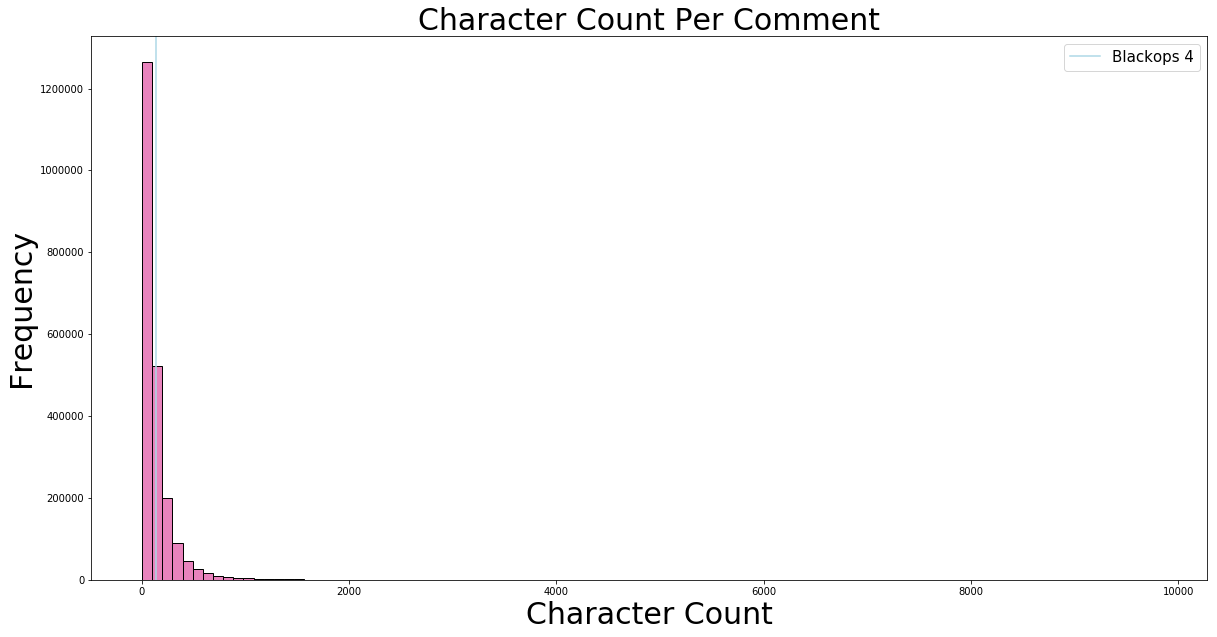

In [224]:
plt.figure(figsize=(20,10))
plt.hist(bo_four['character_count'], 
#                df[df['subreddit']==1]['title_length']],
         bins=100, 
               color=['#E983BD'], 
               ec='k')
# plt.hist([df[df['subreddit']==0]['title_length'], 
#                df[df['subreddit']==1]['title_length']],
#                bins=15, 
#                color=['#23E9E3', '#EF9E35'], 
#                ec='#23E9E3')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Character Count', fontsize = 30)
plt.axvline(bo_four['character_count'].mean(), color = 'lightblue')
# plt.axvline(df[df['subreddit']==1]['title_length'].mean(), color = 'blue')
plt.title('Character Count Per Comment', fontsize=30)
plt.legend(['Blackops 4'], fontsize = 15)
# plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280]);

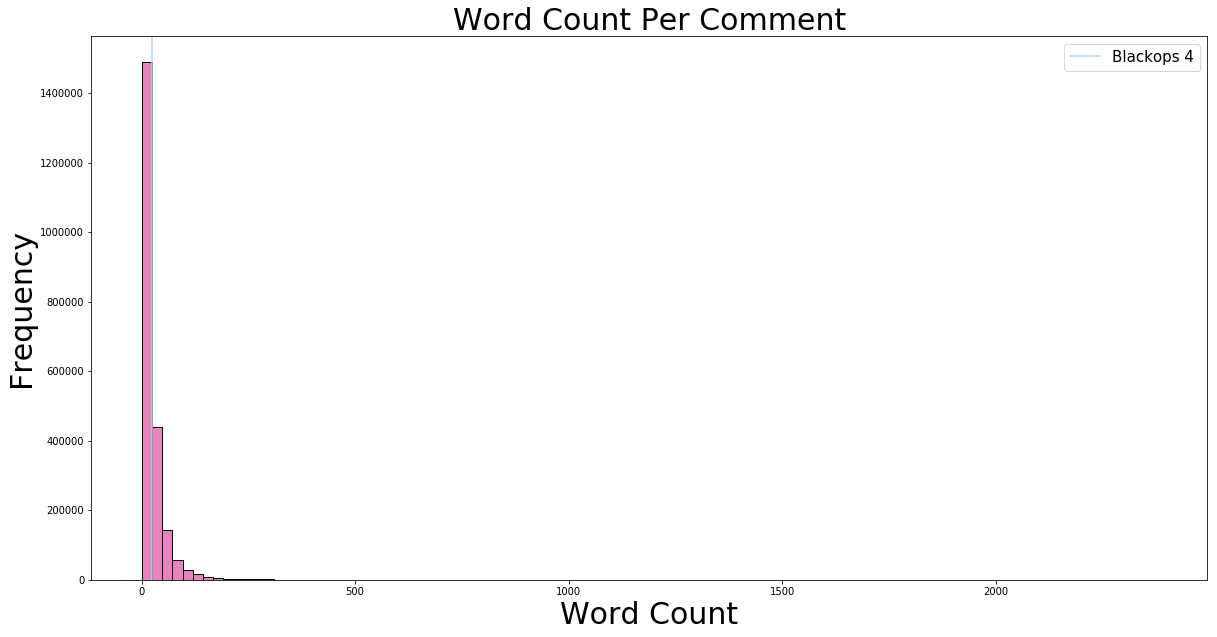

In [225]:
plt.figure(figsize=(20,10))
plt.hist(bo_four['word_count'], 
#                df[df['subreddit']==1]['title_length']],
         bins=100, 
               color=['#E983BD'], 
               ec='k')
# plt.hist([df[df['subreddit']==0]['title_length'], 
#                df[df['subreddit']==1]['title_length']],
#                bins=15, 
#                color=['#23E9E3', '#EF9E35'], 
#                ec='#23E9E3')
plt.ylabel('Frequency', fontsize = 30)
plt.xlabel('Word Count', fontsize = 30)
plt.axvline(bo_four['word_count'].mean(), color = 'lightblue')
# plt.axvline(df[df['subreddit']==1]['title_length'].mean(), color = 'blue')
plt.title('Word Count Per Comment', fontsize=30)
plt.legend(['Blackops 4'], fontsize = 15)
# plt.xticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280]);

In [227]:
bo_four['body'] = bo_four['body'].apply(lambda x: re.sub('([^a-zA-Z ])', '', x))

In [229]:
bo_four['permalink'].loc[1]

1    /r/Blackops4/comments/bjb0vd/got_afterlife_on_...
1    /r/Blackops4/comments/9r9h1l/request_networkin...
1    /r/Blackops4/comments/9xbx2u/firebreak_everyon...
Name: permalink, dtype: object

In [230]:
bo_four.body = bo_four.body.str.lower()

In [234]:
bo_four.to_csv('../data/bo_four.csv')

In [235]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [236]:
cvec = CountVectorizer(ngram_range = (1,1), stop_words = 'english')

In [237]:
X = bo_four['body']

In [238]:
cvec.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [239]:
X_cvec = cvec.transform(X)

In [247]:
cvec.get_feature_names()[500:550]

['abilitiesid',
 'abilitiesif',
 'abilitiesim',
 'abilitiesimagine',
 'abilitiesin',
 'abilitiesit',
 'abilitiesitems',
 'abilitiesitemsddowndup',
 'abilitiesjust',
 'abilitieskilling',
 'abilitieslike',
 'abilitiesmaybe',
 'abilitiesmeanwhile',
 'abilitiesmm',
 'abilitiesmoreso',
 'abilitiesmost',
 'abilitiesobviously',
 'abilitiesof',
 'abilitiesoh',
 'abilitiesoverrated',
 'abilitiespeople',
 'abilitiesperks',
 'abilitiesperksvehicles',
 'abilitiesplaystyle',
 'abilitiespointless',
 'abilitiespowers',
 'abilitiesps',
 'abilitiespsi',
 'abilitiespulling',
 'abilitiesregardless',
 'abilitiesreproduction',
 'abilitiesruin',
 'abilitiesscorestreaks',
 'abilitiesscroestreaks',
 'abilitiesshrugs',
 'abilitiessiege',
 'abilitiesskills',
 'abilitiesspecialist',
 'abilitiesspoken',
 'abilitiesstanding',
 'abilitiesstick',
 'abilitiesstill',
 'abilitiesstim',
 'abilitiesstreaks',
 'abilitiesstrong',
 'abilitiessure',
 'abilitiesthat',
 'abilitiesthats',
 'abilitiesthe',
 'abilitiesthen']

In [ ]:
most_common_words = pd.DataFrame(X_cvec.toarray(), 
                                 columns = X_cvec.get_feature_names()).sum().sort_values(ascending = False)